In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("./data/Datasets_filtering_2.csv")

In [3]:
text_data = data['description'].tolist()

In [4]:
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(text_data)
sequences = tokenizer.texts_to_sequences(text_data)
max_len = max(len(seq) for seq in sequences)
padded_sequences = tf.keras.preprocessing.sequence.pad_sequences(sequences, maxlen=max_len)

In [5]:
embedding_dim = 100
vocab_size = len(tokenizer.word_index) + 1

In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_len),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(max_len)
])

In [7]:
#reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr = 0.0001)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse', metrics = ['accuracy'])

In [8]:
history = model.fit(padded_sequences, padded_sequences, epochs=1000, verbose=0)

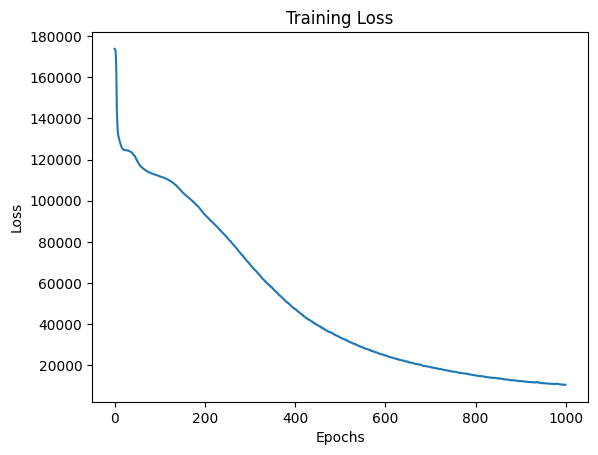

In [9]:
#Plotting the training loss
plt.plot(history.history['loss'])
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

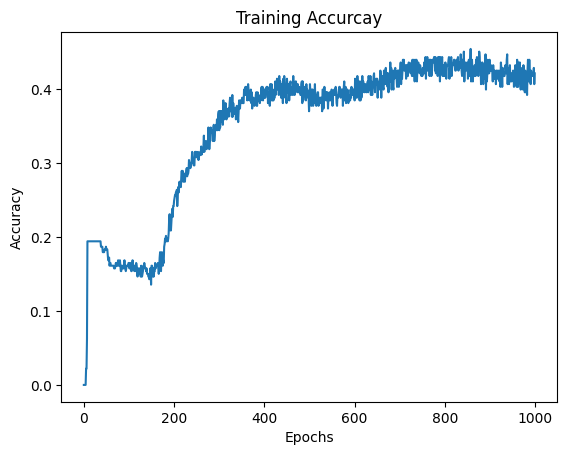

In [10]:
#Plotting the training accuracy
plt.plot(history.history['accuracy'])
plt.title('Training Accurcay')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [11]:
embeddings = model.predict(padded_sequences)

9/9 [==============================] - 0s 10ms/step


In [12]:
def cosine_similarity(a, b):
    dot_product = np.dot(a, b)
    norm_a = np.linalg.norm(a)
    norm_b = np.linalg.norm(b)
    similarity = dot_product / (norm_a * norm_b)
    return similarity

In [13]:
user_input = "tempat yang tenang"
user_sequence = tokenizer.texts_to_sequences([user_input])
user_padded_sequence = tf.keras.preprocessing.sequence.pad_sequences(user_sequence, maxlen=max_len)

In [14]:
user_embedding = model.predict(user_padded_sequence)[0]

1/1 [==============================] - 0s 21ms/step


In [15]:
similarity_scores = []
for embedding in embeddings:
    similarity_scores.append(cosine_similarity(user_embedding, embedding))

In [16]:
top_records_indices = np.argsort(similarity_scores)[-5:]
top_records = data.iloc[top_records_indices]
top_scores = [similarity_scores[i] for i in top_records_indices]

In [17]:
print("Most similar data records:")
#print(top_records)
for i in range(len(top_records)):
    print("Record", i+1)
    print("Similarity Score:", top_scores[i])
    print(top_records.iloc[i])
    print()

Most similar data records:
Record 1
Similarity Score: 0.5904175
_id                                                          167
Kota                                                      Malang
nama                                             Hawai Waterpark
description    Nikmati sensasi keseruan dan kesegarannya untu...
Name: 166, dtype: object

Record 2
Similarity Score: 0.6339385
_id                                                          241
Kota                                                    Surabaya
nama                                                Cafe Bicopi 
description    Tempat nongkong dengan harga kurang terjangkau...
Name: 240, dtype: object

Record 3
Similarity Score: 0.6339385
_id                                                          242
Kota                                                    Surabaya
nama                                           Kopisae Margorejo
description    Tempat nongkong dengan harga kurang terjangkau...
Name: 241, dtype: object

Reco

In [ ]:
#save model
saved_model_path= "./model_recommendation.h5"

model.save(saved_model_path)